## Foreign direct investment, net inflows (BoP, current USD)

In [1]:
# https://data.worldbank.org/indicator/BX.KLT.DINV.CD.WD

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
import errors
%matplotlib inline

In [2]:
def import_worldbank_data(filename):
    """
    Imports World Bank data from a CSV file.

    Parameters:
    - filename: The path to the CSV file.

    Returns:
    - df_country: Original dataframe.
    - df_years: Transposed dataframe.
    """
    df_country = pd.read_csv(filename, skiprows=4)
    df_years = df_country.transpose()
    df_years.columns = df_years.iloc[0]

    return df_country, df_years

In [3]:
df_country, df_years = import_worldbank_data('API_BX.KLT.DINV.CD.WD_DS2_en_csv_v2_6298201.csv')

In [4]:
sub_df = df_country[['Country Name', 'Indicator Name'] + list(map(str, range(2001, 2021)))].dropna()

In [5]:
sub_df.head()

,Country Name,Indicator Name,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,"Foreign direct investment, net inflows (BoP, c...",-2.669274e+08,3.325140e+08,1.597765e+08,-1.056983e+08,-2.077980e+08,2.203161e+08,-4.710056e+08,1.888268e+07,...,4.881564e+08,-3.146927e+08,2.263714e+08,2.506181e+08,-2.877586e+07,2.755127e+07,1.624636e+08,1.359212e+08,-7.522654e+07,1.610670e+08
1,Africa Eastern and Southern,"Foreign direct investment, net inflows (BoP, c...",1.220501e+10,6.464122e+09,8.555149e+09,7.979692e+09,1.033388e+10,7.234543e+09,1.612228e+10,2.248323e+10,...,1.753871e+10,2.463634e+10,2.153425e+10,2.768142e+10,2.877423e+10,1.666027e+10,1.010829e+10,1.358898e+10,1.486866e+10,1.285669e+10
2,Afghanistan,"Foreign direct investment, net inflows (BoP, c...",6.800000e+05,5.000000e+07,5.780000e+07,1.869000e+08,2.710000e+08,2.380000e+08,1.886900e+08,4.603374e+07,...,5.217342e+07,5.682366e+07,4.831135e+07,4.297526e+07,1.691466e+08,9.359132e+07,5.153390e+07,1.194351e+08,2.340455e+07,1.297015e+07
3,Africa Western and Central,"Foreign direct investment, net inflows (BoP, c...",3.224339e+09,4.408519e+09,5.262167e+09,4.653749e+09,9.278129e+09,9.202357e+09,1.303066e+10,1.631744e+10,...,2.450114e+10,2.091269e+10,1.915755e+10,1.659803e+10,1.564317e+10,1.393704e+10,1.766242e+10,1.549284e+10,1.245274e+10,1.075330e+10
4,Angola,"Foreign direct investment, net inflows (BoP, c...",2.145470e+09,1.743504e+09,3.576972e+09,2.197228e+09,-1.303837e+09,-3.771486e+07,-8.933422e+08,1.678971e+09,...,-3.023771e+09,-1.464628e+09,-7.120017e+09,3.657515e+09,1.002822e+10,-1.795176e+08,-7.397295e+09,-6.456076e+09,-4.098479e+09,-1.866468e+09


In [6]:
subset = sub_df[["Country Name", "2020"]].copy()

In [7]:
subset["Growth (%)"] = 100.0 * (sub_df["2020"] - sub_df["2001"]) / (sub_df["2001"])

In [8]:
subset.describe()

,2020,Growth (%)
count,2.350000e+02,2.350000e+02
mean,4.315886e+10,6.920665e+03
std,1.385960e+11,8.794745e+04
min,-2.421676e+11,-7.633622e+04
25%,7.193094e+07,-2.269979e+01
50%,1.004372e+09,1.558197e+02
75%,1.253748e+10,4.812198e+02
max,1.195478e+12,1.334900e+06


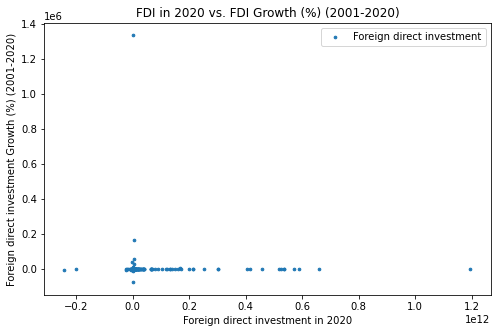

In [9]:
plt.figure(figsize=(8, 5))
scatter_plot = plt.scatter(subset["2020"], subset["Growth (%)"], 7, label="Foreign direct investment")
plt.xlabel("Foreign direct investment in 2020")
plt.ylabel("Foreign direct investment Growth (%) (2001-2020)")
plt.title("FDI in 2020 vs. FDI Growth (%) (2001-2020)")
plt.legend()
plt.show()

In [13]:
import sklearn.preprocessing as pp

def robust_scale_data(subset, features):
    """
    Scale and transform the specified features using RobustScaler.

    Returns:
    - DataFrame: A DataFrame with the specified features scaled and transformed.
    """
    x = subset[features].copy()
    scaler = pp.RobustScaler()
    scaler.fit(x)
    x_norm = scaler.transform(x)

    return x_norm

x_norm = robust_scale_data(subset, ["2020", "Growth (%)"])

In [14]:
def silhouette_score(xy, n):
    """Calculates silhouette score for n clusters"""
    kmeans = KMeans(n_clusters=n, n_init=20)
    kmeans.fit(xy)
    labels = kmeans.labels_
    score = skmet.silhouette_score(xy, labels)
    return score

In [15]:
from sklearn.cluster import KMeans
import sklearn.metrics as skmet

# Calculate silhouette score for different numbers of clusters
for i in range(2, 10):
    score = silhouette_score(x_norm, i)
    print(f"The silhouette score for {i: 3d} is {score: 7.4f}")

The silhouette score for   2 is  0.9902
The silhouette score for   3 is  0.9552
The silhouette score for   4 is  0.9216
The silhouette score for   5 is  0.8242
The silhouette score for   6 is  0.8517
The silhouette score for   7 is  0.8385
The silhouette score for   8 is  0.7341
The silhouette score for   9 is  0.7309


In [15]:
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(x_norm)
labels = kmeans.labels_
cen = kmeans.cluster_centers_
cen = scaler.inverse_transform(cen)
xkmeans = cen[:, 0]
ykmeans = cen[:, 1]

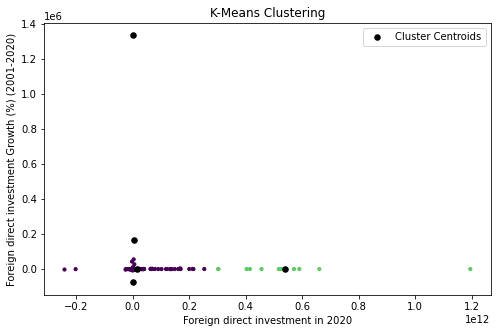

In [16]:
plt.figure(figsize=(8, 5))
palette = sns.color_palette("viridis", n_colors=5, as_cmap=True)
plt.scatter(subset["2020"], subset["Growth (%)"], c=labels, marker="o", s=10, cmap=palette)
plt.scatter(xkmeans, ykmeans, c="black", s=30, label="Cluster Centroids")
plt.xlabel("Foreign direct investment in 2020")
plt.ylabel("Foreign direct investment Growth (%) (2001-2020)")
plt.title("K-Means Clustering")
plt.legend()
plt.show()

In [17]:
ind_df = df_years.loc['2001':'2020', ['India']].reset_index().rename(columns={'index': 'Year', 'India': 'Foreign direct investment'})
ind_df = ind_df.apply(pd.to_numeric, errors='coerce')
ind_df.describe()

Country Name,Year,Foreign direct investment
count,20.00000,2.000000e+01
mean,2010.50000,2.935539e+10
std,5.91608,1.737734e+10
min,2001.00000,3.681985e+09
25%,2005.75000,1.683919e+10
50%,2010.50000,3.136484e+10
75%,2015.25000,4.243966e+10
max,2020.00000,6.436236e+10


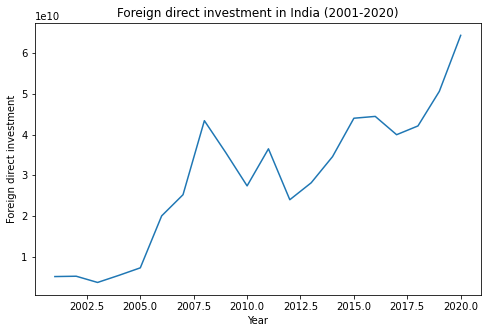

In [18]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=ind_df, x='Year', y='Foreign direct investment')
plt.xlabel('Year')
plt.ylabel('Foreign direct investment')
plt.title('Foreign direct investment in India (2001-2020)')
plt.show()

In [19]:
def poly(x, a, b, c, d, e):
    """ Calulates polynominal"""
    x = x - 2001
    f = a + b*x + c*x**2 + d*x**3 + e*x**4
    return f

In [20]:
param, covar = opt.curve_fit(poly, ind_df["Year"], ind_df["Foreign direct investment"])
sigma = np.sqrt(np.diag(covar))
year = np.arange(2000, 2026)
forecast = poly(year, *param)
sigma = errors.error_prop(year, poly, param, covar)
low = forecast - sigma
up = forecast + sigma
ind_df["fit"] = poly(ind_df["Year"], *param)

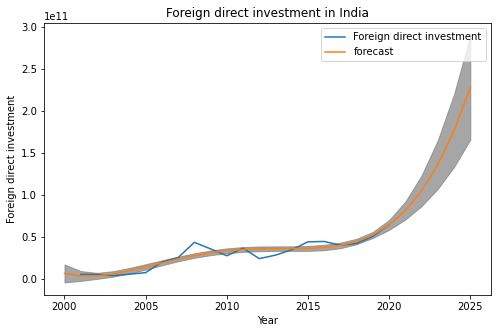

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(ind_df["Year"], ind_df["Foreign direct investment"], label="Foreign direct investment")
plt.plot(year, forecast, label="forecast")
plt.fill_between(year, low, up, color="grey", alpha=0.7)
plt.title("Foreign direct investment in India")
plt.xlabel("Year")
plt.ylabel("Foreign direct investment")
plt.legend()
plt.show()